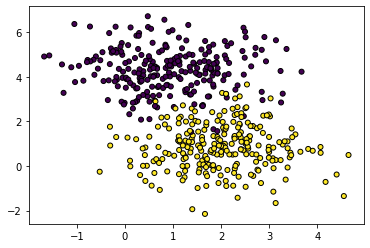

In [59]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [60]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [62]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  # add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  # add intercept

In [63]:
class LogisticRegression:
    
    def __init__(self, alpha=0.0001, max_iter=20000, loss_old=10000):
        self.alpha = alpha
        self.max_iter = max_iter
        self.loss_old = loss_old
        
    def mini_batch_GD(self,X, y):
        batch_size = int(0.1 * X.shape[0])
        for i in range(20000):
            ix = np.random.randint(0, X.shape[0]) #<----with replacement
            batch_X = X[ix:ix+batch_size]
            batch_y = y[ix:ix+batch_size]
            loss, grad = self.gradient(batch_X, batch_y)
            if i % 500 == 0:
                print(f"Loss at iteration {i}", loss)
                self.losses.append(loss)
            self.w = self.w - self.alpha * grad
            
            
    def gradient(self, X, y):
        m = X.shape[0]
        h = self.h_theta(X)
        error = h - y
        # putting negative sign for negative log likelihood
        loss = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        grad = np.dot(X.T, error)
        return loss, grad

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def h_theta(self, X):
        return self.sigmoid(X @ self.w)

    def predict(self, X_test):
        yhat = np.round(self.sigmoid(X_test @ self.w))
        return yhat
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
        
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        l_rate = 0.01
        self.losses = []
        self.mini_batch_GD(X,y)
    

In [64]:
model = LogisticRegression()
model.fit(X_train, y_train)

Loss at iteration 0 8.317766166719343
Loss at iteration 500 15.453889953206467
Loss at iteration 1000 11.848542044877883
Loss at iteration 1500 10.403151040085778
Loss at iteration 2000 7.859956918926682
Loss at iteration 2500 7.808785643355352
Loss at iteration 3000 5.1966650907408765
Loss at iteration 3500 7.149057564639657
Loss at iteration 4000 7.470558739573644
Loss at iteration 4500 6.083293705877659
Loss at iteration 5000 5.35420547930133
Loss at iteration 5500 5.1720636319419615
Loss at iteration 6000 5.624599951681224
Loss at iteration 6500 4.47067447140693
Loss at iteration 7000 5.792690074506412
Loss at iteration 7500 6.235518440995075
Loss at iteration 8000 5.85974115919699
Loss at iteration 8500 4.742276124038991
Loss at iteration 9000 3.859407149764921
Loss at iteration 9500 3.787940286825839
Loss at iteration 10000 5.168717807114095
Loss at iteration 10500 3.4027424689186807
Loss at iteration 11000 2.739183125348507
Loss at iteration 11500 2.76444162841865
Loss at iterat

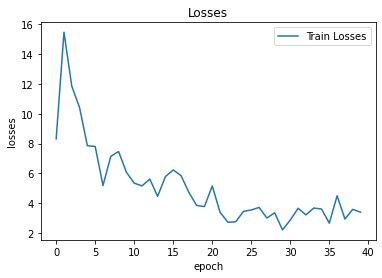

In [65]:
model.plot()

In [66]:
yhat = model.predict(X_test)
print(yhat)

[0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 0.]


In [67]:
class classification_reports():
    
    def __init__(self,act,pre):
        self.act  = act
        self.pre = pre 
        
        self.tp = sum((self.act == 1) & (self.pre == 1))
        self.tn = sum((self.act == 0) & (self.pre == 0))
        self.fn = sum((self.act == 1) & (self.pre == 0))
        self.fp = sum((self.act == 0) & (self.pre == 1))
        
    def accuracy(self):
        self.acc = (self.tp+self.tn)/(self.tp+self.tn+self.fp+self.fn)*100
        return self.acc
    
    def recall(self):
        self.recall = self.tp/(self.tp+self.fn)*100
        return self.recall
    
    def precision(self):
        self.precision = self.tp/(self.tp+self.fp)*100
        return self.precision
    
    def f1(self):
        self.f1 = 2*(self.precision*self.recall)/(self.precision+self.recall)
        return self.f1

In [68]:
report = classification_reports(y_test, yhat)
print(f"Accuracy: {report.accuracy()}")
print(f"Recall: {report.recall()}")
print(f"Precision: {report.precision()}")
print(f"F1: {report.f1()}")

Accuracy: 95.33333333333334
Recall: 95.94594594594594
Precision: 94.66666666666667
F1: 95.30201342281879


In [69]:
from sklearn.metrics import classification_report
print("Report: ", classification_report(y_test, yhat))

Report:                precision    recall  f1-score   support

           0       0.96      0.95      0.95        76
           1       0.95      0.96      0.95        74

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

